#### About the Dataset

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

### Importing Libraries

In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [291]:
df = pd.read_csv("baseball.csv")
df.head(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


### From the dataset its is clear that it is a regression problem, and our target variable is 'W'

#### Checking for null values

In [292]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

#### Dataset have no null values

In [293]:
df.shape

(30, 17)

### EDA

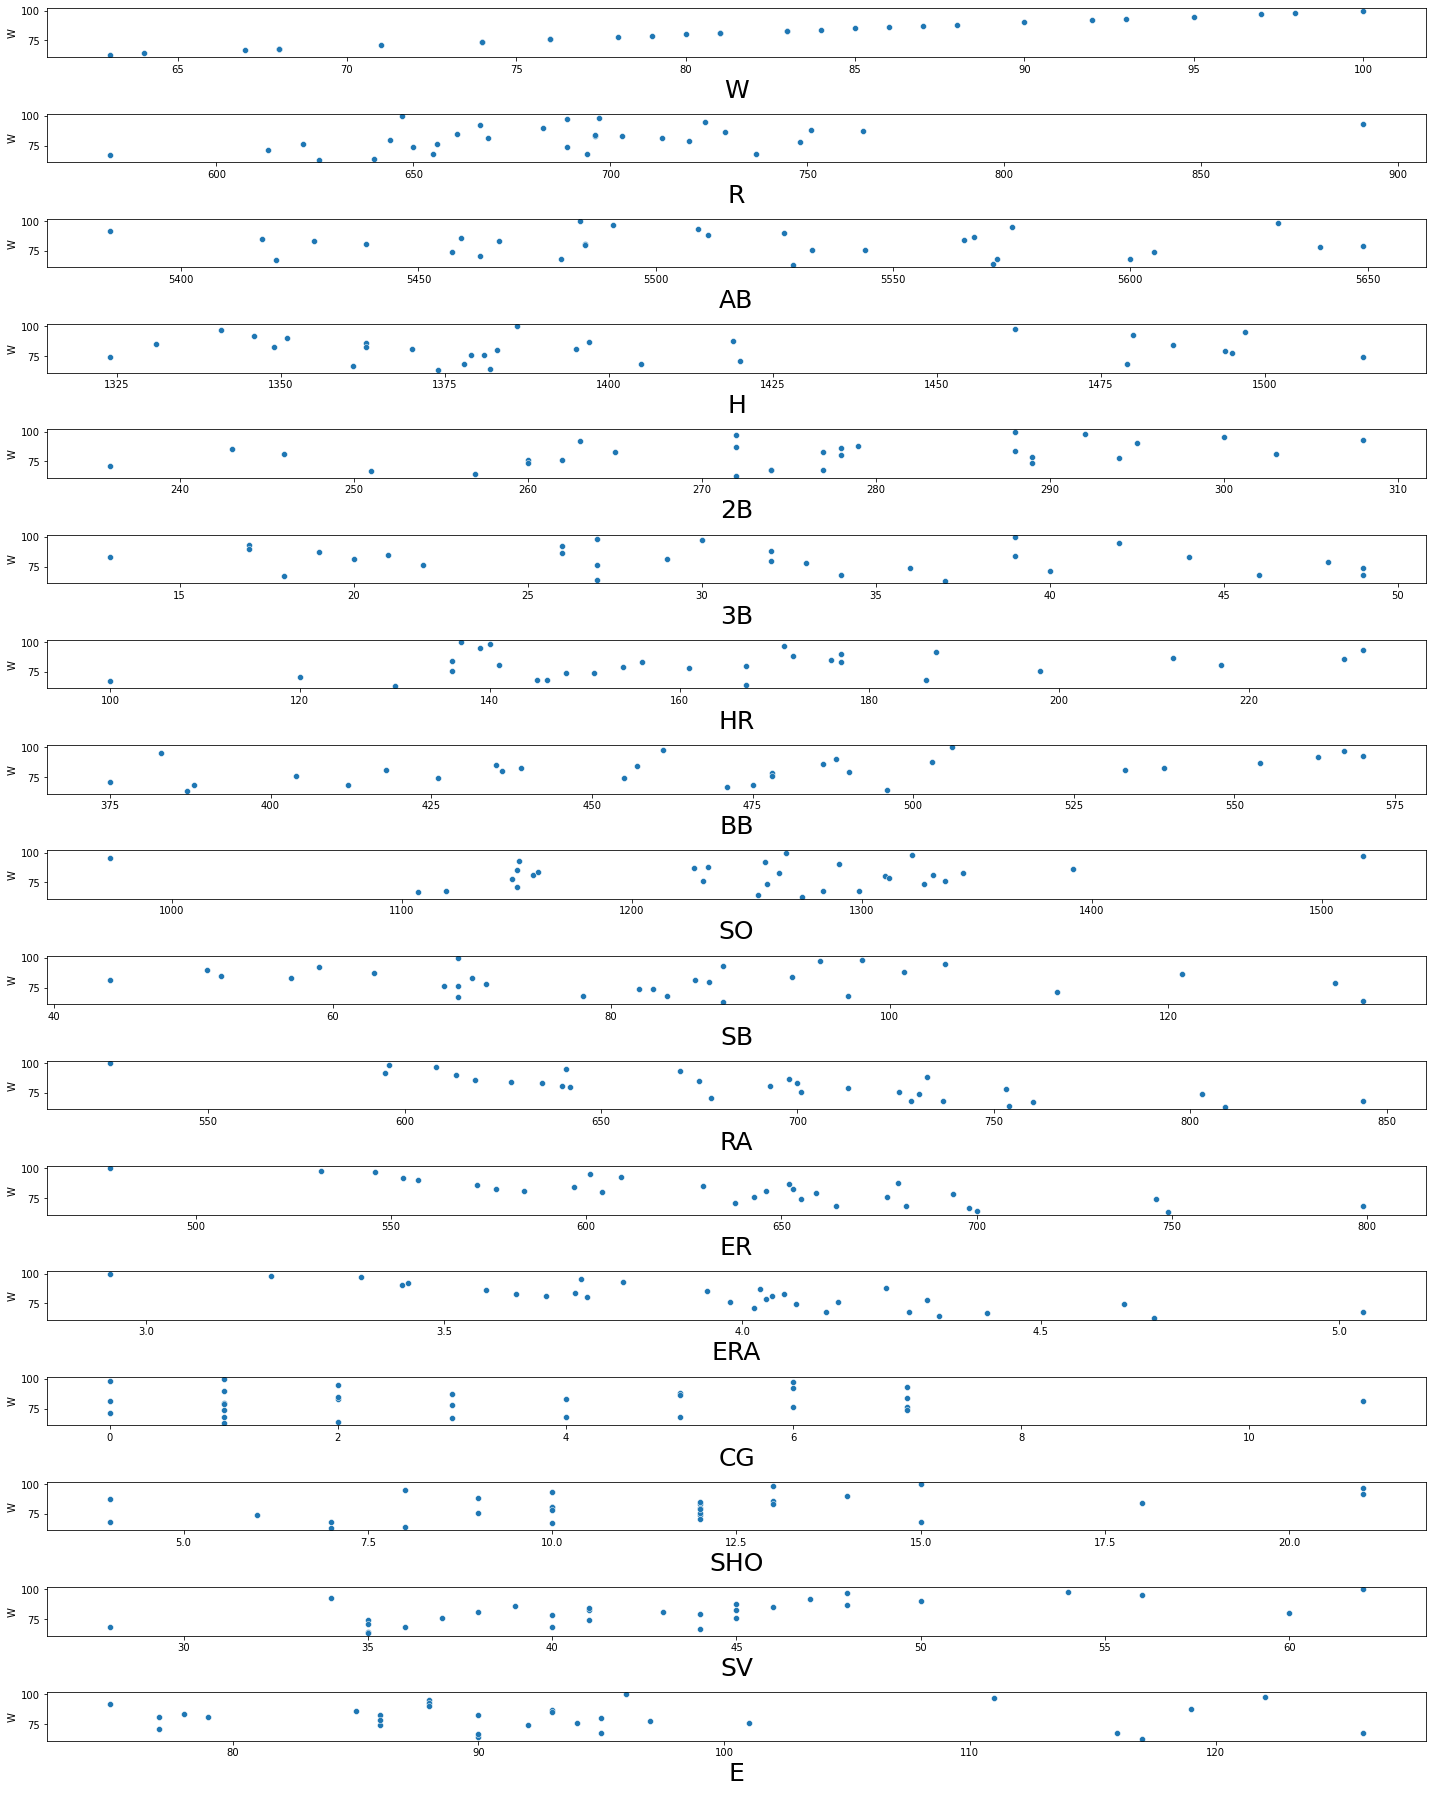

In [294]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in df:
    if plotnumber<=17:
        ax=plt.subplot(17,1,plotnumber)
        sns.scatterplot(x=df[column],y=df['W'],data=df)
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

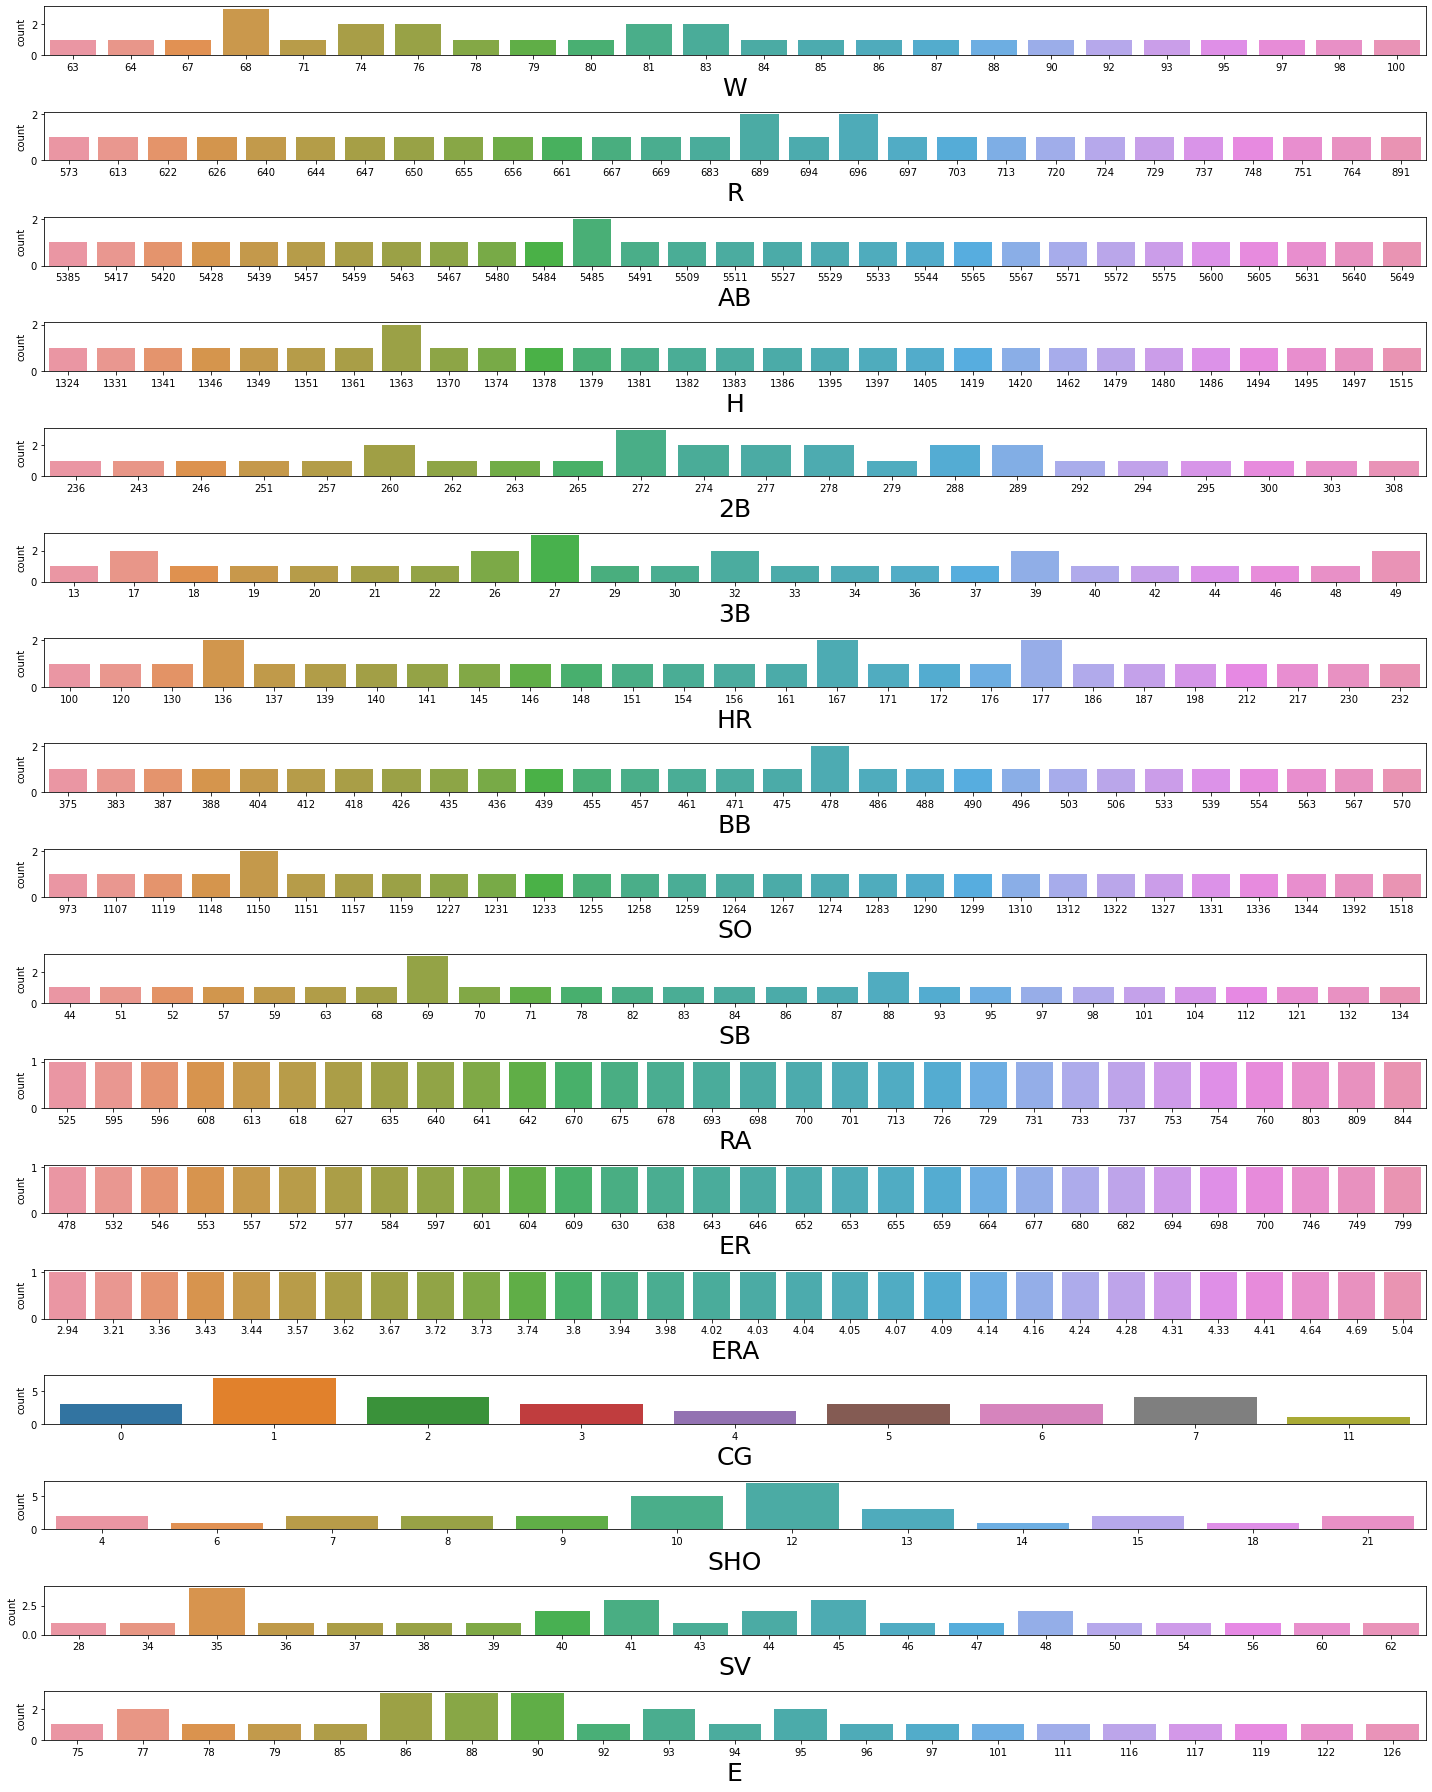

In [295]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in df:
    if plotnumber<=17:
        ax=plt.subplot(17,1,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

In [296]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


#### ER, RA and ERA is having the highest collinearity with 'W', but multicollinearity also exist with these feature variables

#### Visual Representation of Correlation matrix

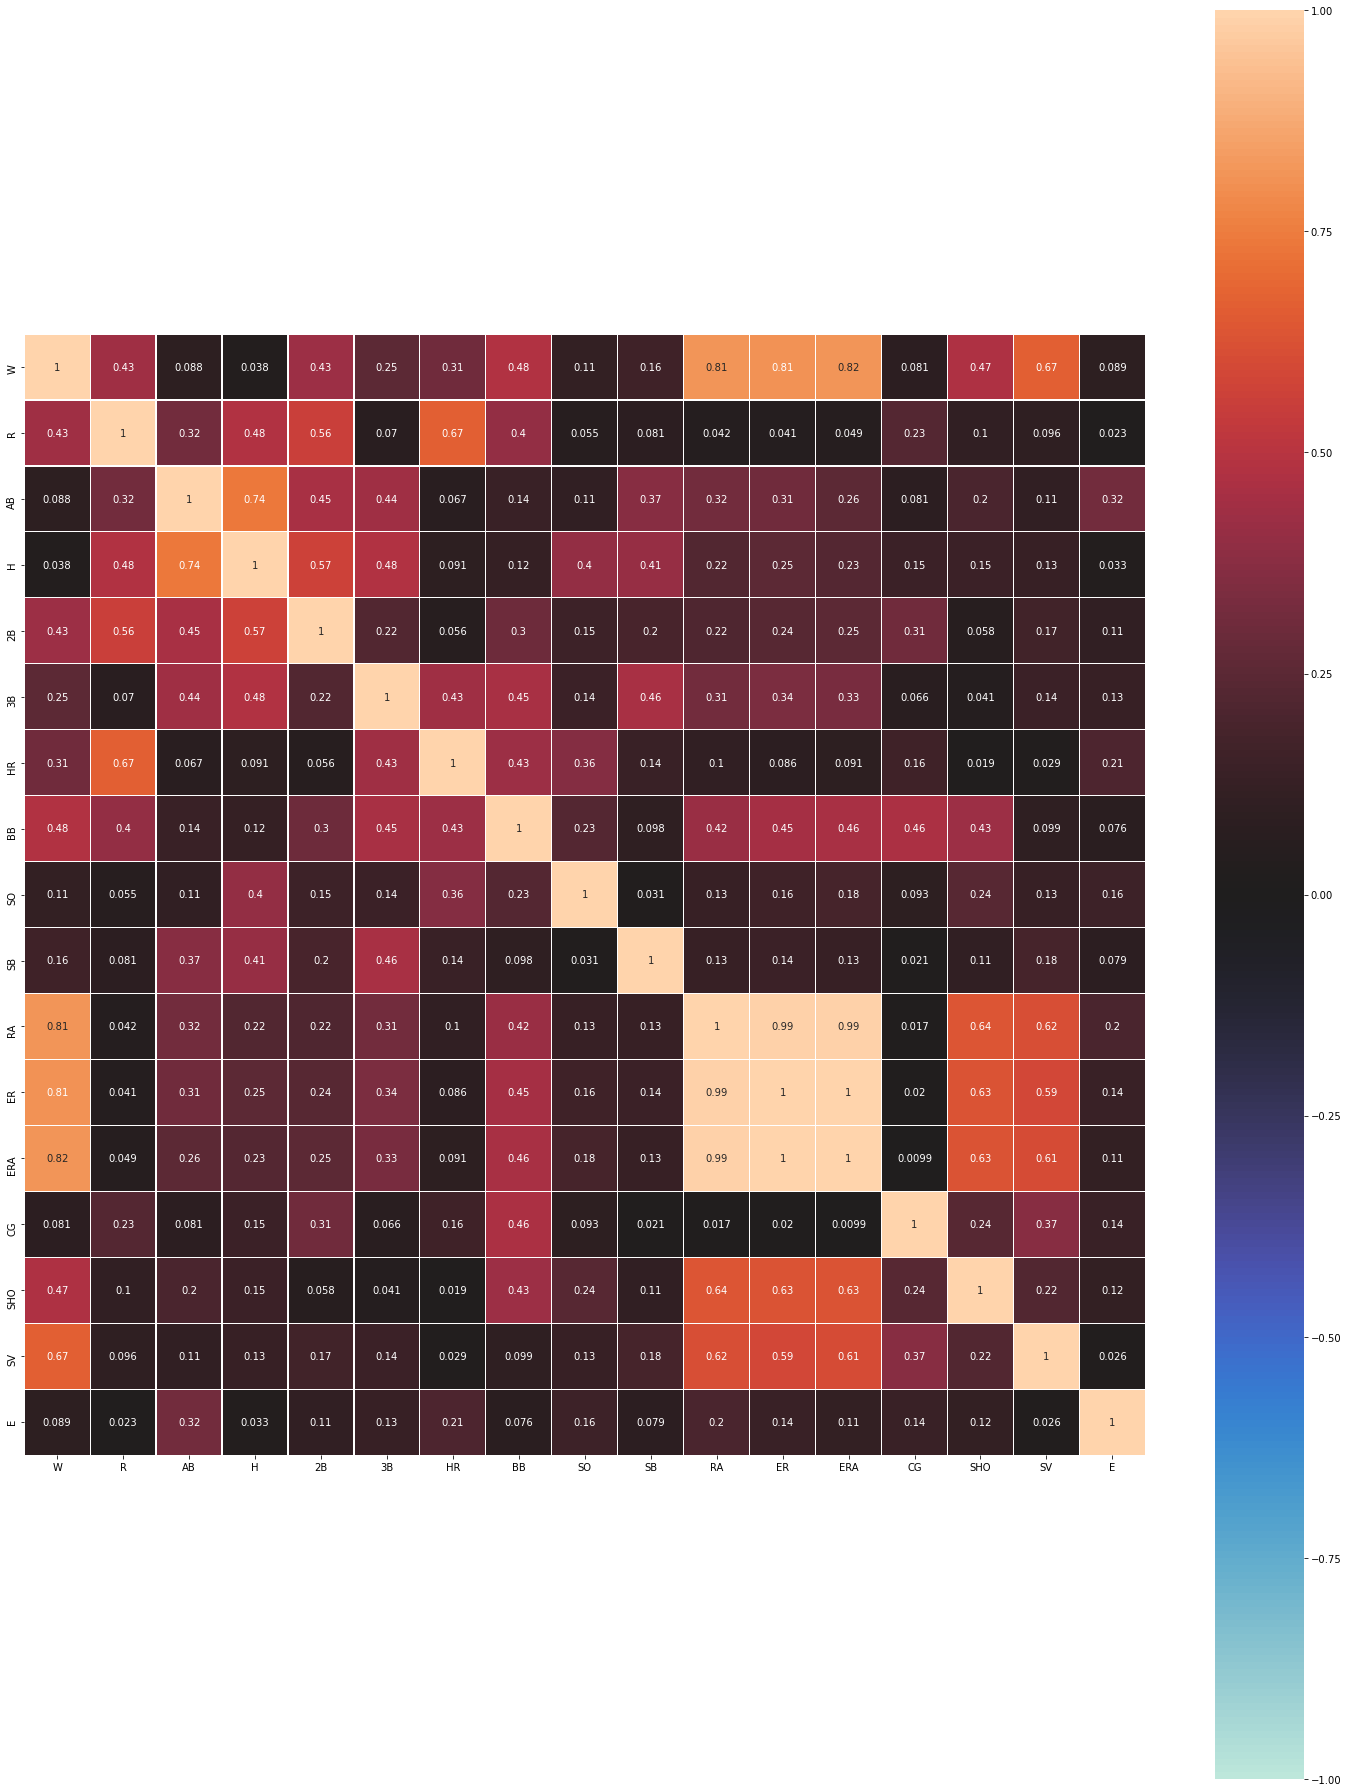

In [297]:
df_corr = df.corr().abs()
plt.figure(figsize=(20,25))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square = True,center=0,fmt='.2g',linewidth=.2)
plt.tight_layout()

#### Multicollinearity exists between ER,RA and ERA

#### Statistical Analysis

In [298]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


#### Checking for outliers

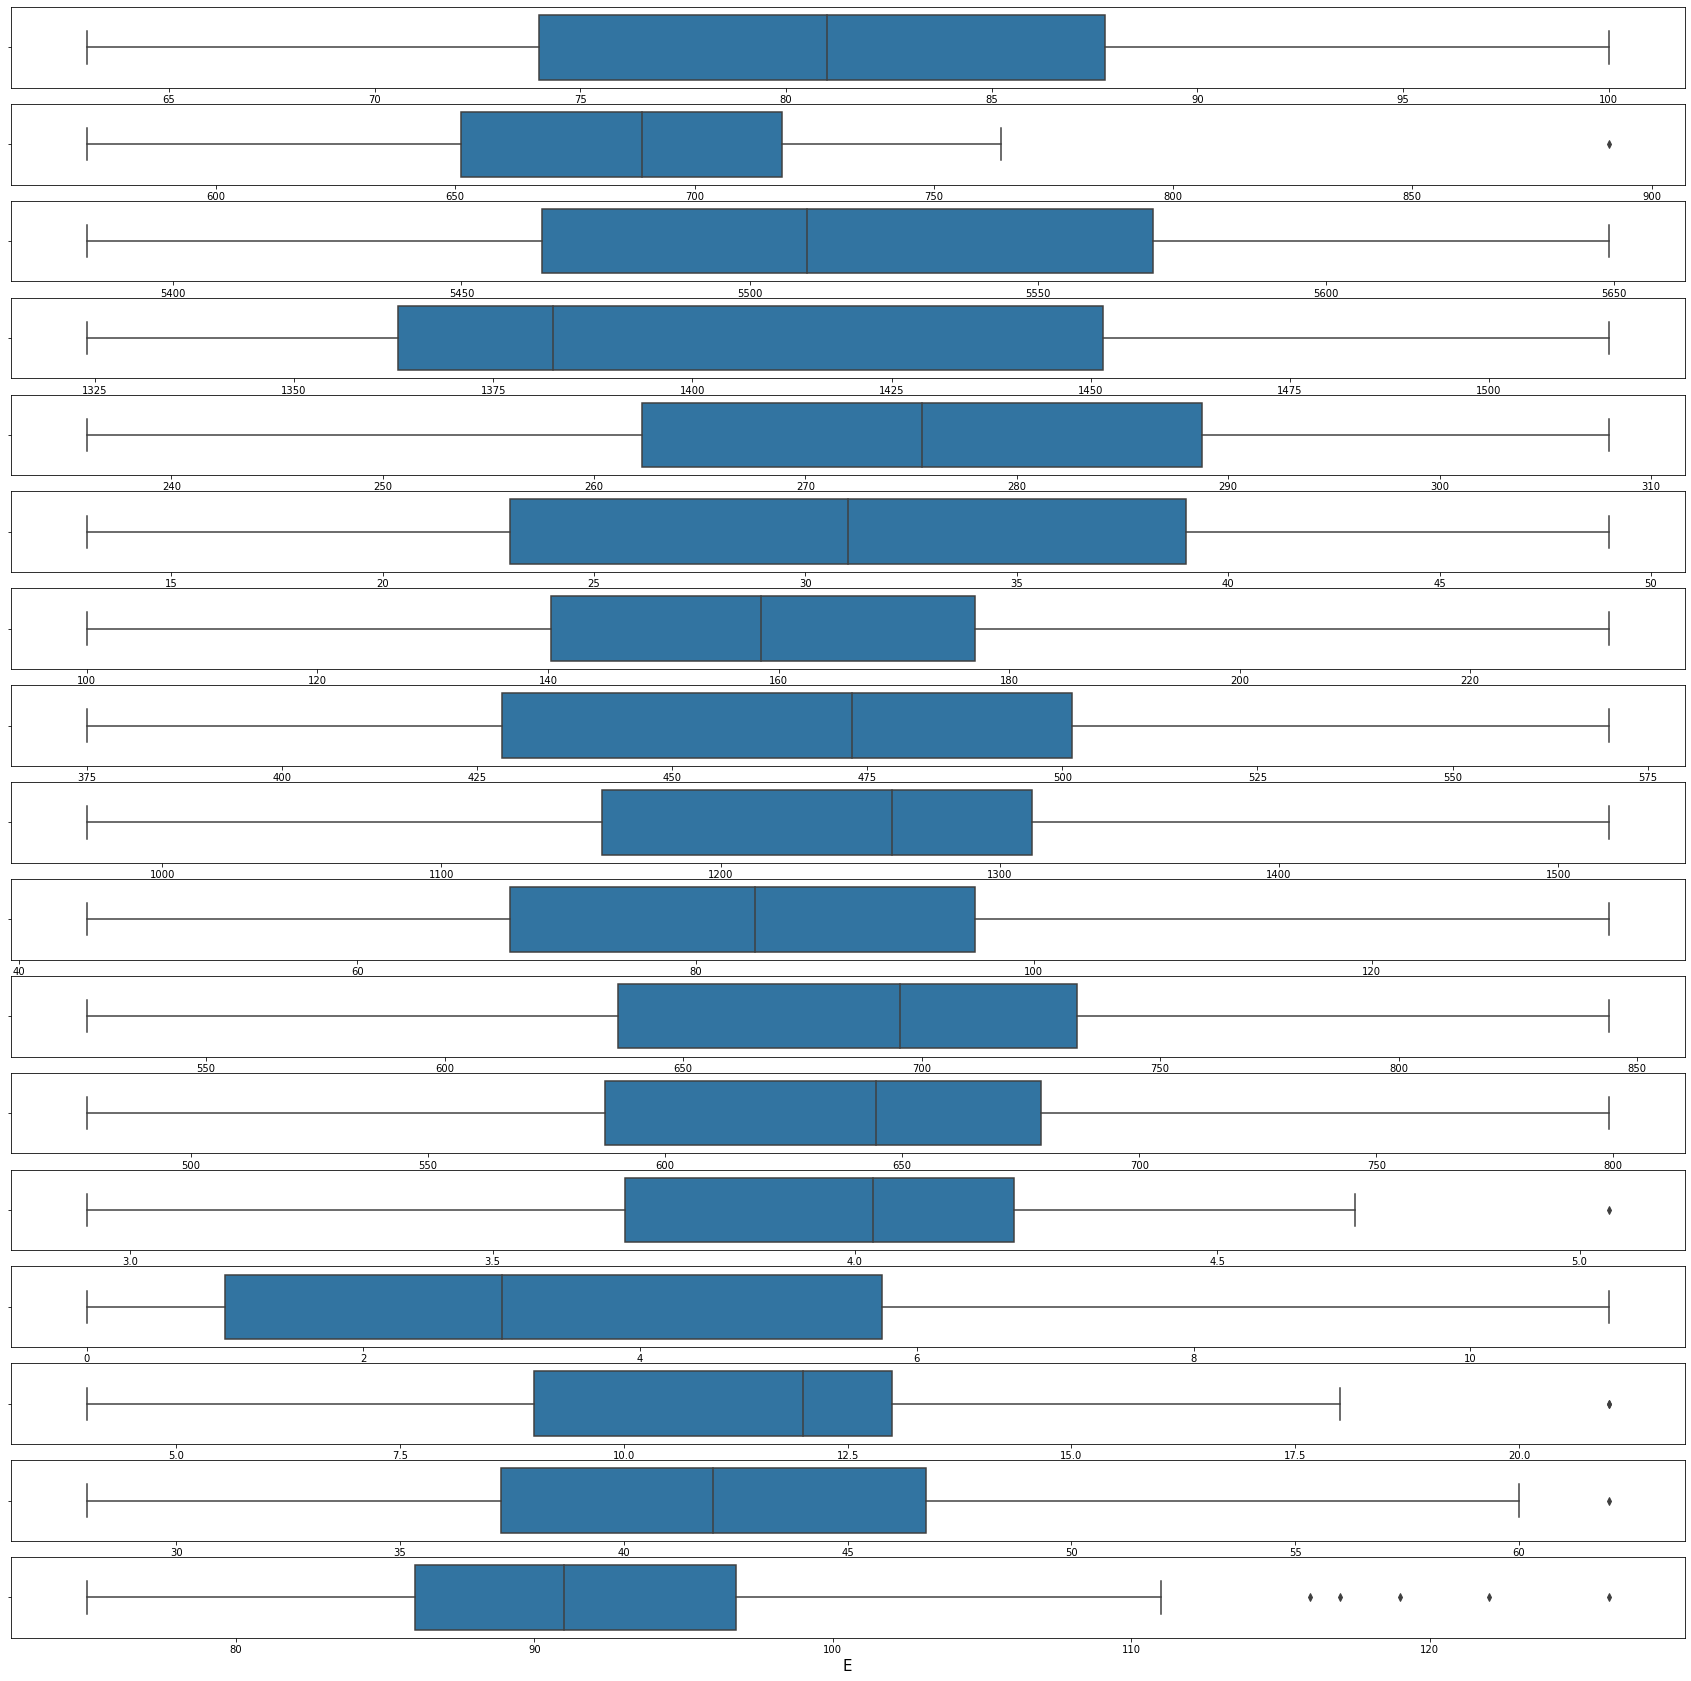

In [299]:
plt.figure(figsize=(30,30))
gr = 1
for column in df:
    if gr<=17:
        ax = plt.subplot(17,1,gr)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=15)
    gr+=1
plt.show()

#### Outliers exists on R,ERA, SHO, SV and E

#### Skewness present in data

In [300]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

#### Skewness exists in the following feature variables:
* R
* H
* HR
* CG
* SHO
* SV
* E

#### Data Cleaning
##### Dropping the feature column E because the correlation with target variable is negligible(-0.08), skewness and outlier exists

In [301]:
df = df.drop(columns=['R','AB','H'])
df.head(3)

,W,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,303,29,141,533,1157,86,640,584,3.67,11,10,38,79


#### Outlier Removal

In [302]:
from scipy.stats import zscore
z = np.abs(zscore(df))
print("Old shape : ",z.shape)
print("---------------------------------------------------------")
print(z)
print("----------------------------------------------------------")
print("Row numbers : ",np.where(z>3)[0])
print("Column numbers : ",np.where(z>3)[0])
index = np.where(z>3)[0]
df1 = df.drop(df.index[index])
print("-----------------------------------------------------------")
print("New shape : ",df1.shape)

Old shape :  (30, 14)
---------------------------------------------------------
[[1.3654086  1.42017307 1.04119304 0.7872986  1.53490242 2.69762957
  0.91388329 0.66623393 0.50511008 0.50695519 0.5398062  0.81462859
  1.67160651 0.46146963]
 [0.1978383  0.12740339 1.23580856 0.24396668 0.5365919  0.15487844
  0.60182558 0.16597077 0.24892985 0.25459752 0.5398062  0.1728
  0.24987932 0.60719689]
 [0.00324325 1.58879521 0.22380785 0.7233772  1.13914361 0.89398189
  0.11144918 0.68033909 0.75162313 0.64134684 2.77264091 0.32091429
  0.65485616 1.11724227]
 [0.48324437 0.82812203 0.41842337 0.8831807  1.16053598 0.16860185
  0.69098493 0.18007593 0.10392217 0.05301004 1.3004422  0.56777144
  0.78410408 0.48575751]
 [0.67783942 0.80189192 1.72234737 0.40377019 0.25136033 0.10586628
  0.02228984 1.61880269 1.59750126 1.53131824 1.3004422  0.1728
  1.04259994 0.60719689]
 [1.17081355 1.86983209 1.39150098 2.18504658 1.79874163 0.95279649
  0.20060853 0.25718416 0.38910394 0.35016492 1.3004422

#### Just one row is dropped

#### Splitting the dataset into features(x) and target(y)

In [303]:
x = df.drop("W",axis=1)
y = df["W"]

#### Removing skewness from x

In [304]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x,method='yeo-johnson')
x_new

array([[ 1.47768528,  1.03310301, -0.76462586, -1.61091476, -2.56989562,
         0.93970819, -0.66033096, -0.49742469, -0.50089346, -0.35984364,
        -0.78957937,  1.546378  , -0.3349525 ],
       [ 0.08426878,  1.2033202 , -0.15858141, -0.50274883,  0.13491294,
        -0.53969308,  0.17546536,  0.25797351,  0.26180619, -0.35984364,
         0.25177537,  0.36044386, -0.53221128],
       [ 1.67078208, -0.16026987, -0.68967629,  1.1282937 , -0.90125379,
         0.2119555 , -0.67462053, -0.74690639, -0.63645949,  1.99351257,
        -0.24539345, -0.6075936 , -1.34233137],
       [-0.84859969, -0.36052064, -0.8790486 , -1.18120722, -0.1896282 ,
        -0.64256433,  0.18951225,  0.11357524,  0.06080381,  1.22010317,
        -0.51075929, -0.76445333,  0.67852361],
       [ 0.79218291,  1.61644394, -0.3298501 , -0.20677062,  0.08545863,
         0.07962852,  1.6032282 ,  1.5826538 ,  1.52095856,  1.22010317,
         0.25177537, -1.09501024, -0.53221128],
       [ 1.99850636, -1.461061

In [305]:
#Checking skewness
x_new = pd.DataFrame(x_new,columns=x.columns)
x_new.skew()

2B    -0.035315
3B    -0.072933
HR    -0.000065
BB    -0.007760
SO     0.041170
SB    -0.010455
RA    -0.008082
ER    -0.001940
ERA    0.001746
CG    -0.059785
SHO    0.006560
SV     0.000836
E      0.063909
dtype: float64

#### Visualizing the distribution

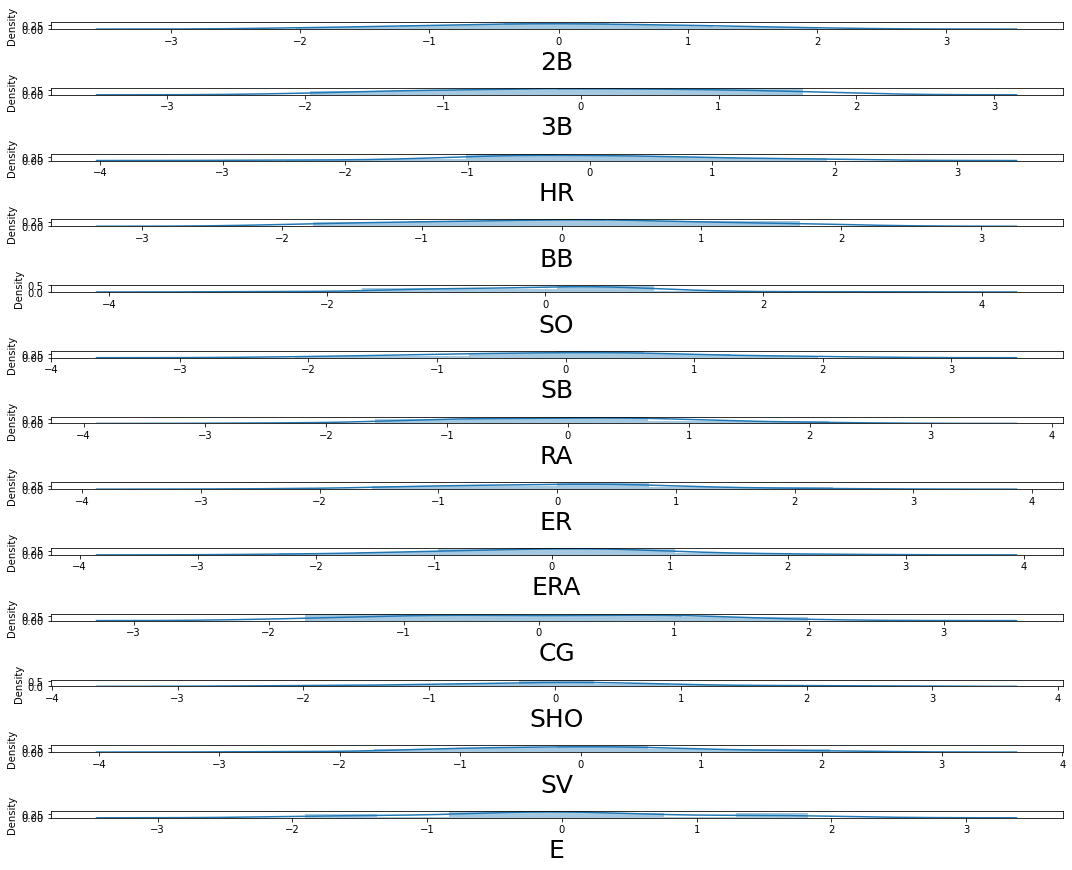

In [306]:
plt.figure(figsize=(15,15),facecolor="white")
plotnumber=1
for column in x_new:
    if plotnumber<=17:
        ax=plt.subplot(17,1,plotnumber)
        sns.distplot(x_new[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

#### Scaling X

In [307]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_scaled = scale.fit_transform(x_new)

#### Checking Multicollinearity

In [308]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(x_new.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,2.221041,2B
1,2.697792,3B
2,2.867884,HR
3,3.331177,BB
4,2.321817,SO
5,1.888334,SB
6,177.760829,RA
7,543.300331,ER
8,314.143795,ERA
9,2.162372,CG


#### if vif>=5, multicollinearity exists
So, its clear that RA,ER and ERA have multicollinearity

#### Performing PCA

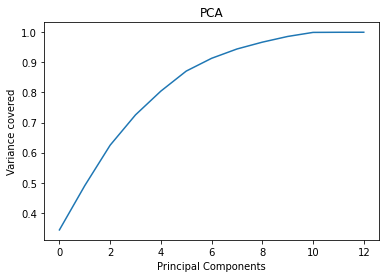

In [309]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principal Components")
plt.ylabel("Variance covered")
plt.title("PCA")
plt.show()

In [310]:
pca = PCA(n_components=8)
principal = pca.fit_transform(X_scaled)
principal_x = pd.DataFrame(principal,columns=['PC1','PC2',"PC3","PC4","PC5","PC6","PC7","PC8"])
principal_x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.122222,2.923067,-1.131274,-1.273883,-1.971299,-1.233734,-0.013818,-0.116240
1,0.415374,0.722181,0.137206,-0.245527,0.405186,-0.392441,-1.263435,-0.081386
2,-1.197085,-0.690806,-2.490137,-1.620368,-0.615915,-0.218444,0.388251,-0.407486
3,0.999218,-0.173653,0.354375,-0.637650,0.017255,1.423663,0.123914,0.207488
4,2.616663,-0.732255,-1.717242,-0.342217,0.809062,-0.031771,-1.499466,-0.347800
5,-1.190694,-2.650587,-1.956650,-0.376999,-1.448764,-0.849139,0.899481,1.062989
6,-0.199329,-2.005706,1.152146,0.288726,-1.975235,-0.753995,0.464740,-0.640142
7,-0.229732,-0.989912,3.563169,-0.745016,0.592807,-1.341917,-0.733410,0.828391
8,-1.174622,1.378293,0.800822,0.986207,-0.290353,-0.610481,-0.460158,-0.523388
9,1.290011,-0.416999,-0.702503,-0.335861,-1.186135,0.212997,-0.629617,0.194819


#### Finding the best Random state

In [311]:
max_score = 0
max_rs = 0
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
for i in range(1,300):
    x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size=0.25,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    score = r2_score(y_test,y_pred)
    if score>max_score:
        max_score = score
        max_rs = i
print("Maximum score is",max_score,"when",max_rs,"is the random state")

Maximum score is 0.9128748294567244 when 111 is the random state


#### Splitting the dataset into train and test

In [312]:
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size=0.25,random_state = 111)

### MODEL TRAINING

#### i) Linear Regression

In [313]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("Score in training dataset = ",lr.score(x_train,y_train))
print("Score in testing dataset = ",lr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred))
print("MSE is :",mean_squared_error(y_test,y_pred))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 score is: ",r2_score(y_test,y_pred))

Score in training dataset =  0.7704153548336431
Score in testing dataset =  0.9128748294567244
MAE is :  2.670501808932501
MSE is : 12.153961290786953
RMSE is : 3.4862531879923684
R2 score is:  0.9128748294567244


#### ii) Lasso

In [314]:
from sklearn.linear_model import Lasso,LassoCV
lassocv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lassocv.fit(x_train,y_train)
alpha = lassocv.alpha_
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)
print("Score after Cross validation by L1 is ",lasso_reg.score(x_test,y_test))

Score after Cross validation by L1 is  0.8213003619880284


#### iii) Ridge

In [315]:
from sklearn.linear_model import Ridge,RidgeCV
ridgecv = RidgeCV(alphas=np.arange(0.0001,1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)
alpha = ridgecv.alpha_
ridge_reg = Ridge(alpha)
ridge_reg.fit(x_train,y_train)
print("Score after Cross validation by L2 is ",ridge_reg.score(x_test,y_test))

Score after Cross validation by L2 is  0.9089081976640258


#### iv) DecisionTree 

In [316]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print("Score in training dataset is ",dt.score(x_train,y_train))
print("Score in testing dataset is ",dt.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_dt))
print("MSE is :",mean_squared_error(y_test,y_pred_dt))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_dt)))

Score in training dataset is  1.0
Score in testing dataset is  0.5062724014336917
MAE is :  7.625
MSE is : 68.875
RMSE is : 8.299096336348915


#### v) RandomForest Regressor

In [317]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Score in training dataset is ",rf.score(x_train,y_train))
print("Score in testing dataset is ",rf.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_rf))
print("MSE is :",mean_squared_error(y_test,y_pred_rf))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_rf)))

Score in training dataset is  0.9415845045124953
Score in testing dataset is  0.6834695340501792
MAE is :  5.715
MSE is : 44.156000000000006
RMSE is : 6.644998118886115


#### vi)GradientBoosting

In [318]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred_gbr = gbr.predict(x_test)
print("Score in training dataset is ",gbr.score(x_train,y_train))
print("Score in training dataset is ",gbr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_gbr))
print("MSE is :",mean_squared_error(y_test,y_pred_gbr))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_gbr)))

Score in training dataset is  0.9999970172506203
Score in training dataset is  0.6651052454088352
MAE is :  6.616500665151861
MSE is : 46.71781826546749
RMSE is : 6.835043398945429


#### vii) SVR

In [319]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
y_pred_svr = svr.predict(x_test)
print("Score in training dataset is ",svr.score(x_train,y_train))
print("Score in training dataset is ",svr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_svr))
print("MSE is :",mean_squared_error(y_test,y_pred_svr))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_svr)))

Score in training dataset is  0.23075214223647378
Score in training dataset is  0.07329009120819685
MAE is :  9.476741341512577
MSE is : 129.27603227645653
RMSE is : 11.369961841468797


#### viii) XGBRegressor

In [320]:
import xgboost as xgb
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(x_train,y_train)
y_pred_xgbr = xgbr.predict(x_test)
print("Score in training dataset is ",xgbr.score(x_train,y_train))
print("Score in training dataset is ",xgbr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_xgbr))
print("MSE is :",mean_squared_error(y_test,y_pred_xgbr))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_xgbr)))

Score in training dataset is  0.9999999965201714
Score in training dataset is  0.7607764141273385
MAE is :  5.150249481201172
MSE is : 33.371690229236265
RMSE is : 5.776823541466042


#### ix) KNN Regressor

In [321]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
print("Score in training dataset is ",knn.score(x_train,y_train))
print("Score in training dataset is ",knn.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_knn))
print("MSE is :",mean_squared_error(y_test,y_pred_knn))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_knn)))

Score in training dataset is  0.5906069139854091
Score in training dataset is  0.5566666666666666
MAE is :  6.625
MSE is : 61.845000000000006
RMSE is : 7.864159204899148


#### Finding cross validation score

In [322]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(dt,principal_x,y,cv=5)
cvs = np.mean(cvs)
print("Cross validation score of Decision tree model is : ",cvs)

Cross validation score of Decision tree model is :  -0.5718224649004837


In [323]:
cvs = cross_val_score(lr,principal_x,y,cv=5)
cvs = np.mean(cvs)
print("Cross validation score of LR model is : ",cvs)

Cross validation score of LR model is :  0.15827851265168574


In [324]:
cvs = cross_val_score(rf,principal_x,y,cv=5)
cvs = np.mean(cvs)
print("Cross validation score of RandomForestRegressor model is : ",cvs)

Cross validation score of RandomForestRegressor model is :  0.031162155146197756


In [325]:
cvs = cross_val_score(gbr,principal_x,y,cv=5)
print("Cross validation score of GradientDescent Boosting model is : ",cvs.mean())

Cross validation score of GradientDescent Boosting model is :  0.12101363633497923


In [326]:
cvs = cross_val_score(svr,principal_x,y,cv=5)
print("Cross validation score of SVR model is : ",cvs.mean())

Cross validation score of SVR model is :  -0.41854492719364733


In [327]:
cvs = cross_val_score(xgbr,principal_x,y,cv=5)
print("Cross validation score of XGBRegressor model is : ",cvs.mean())

Cross validation score of XGBRegressor model is :  0.21378438065439198


In [328]:
cvs = cross_val_score(knn,principal_x,y,cv=5)
print("Cross validation score of KNN Regressor model is : ",cvs.mean())

Cross validation score of KNN Regressor model is :  -0.4301522037299317


#### Finding Best model

In [337]:
models = pd.DataFrame({
    "Model":["Linear regression","Decision Tree","Random Forest","GradientBoosting","SVR","XGB","KNN"],
    "Accuracy Score":["91.28","50.63","68.35","66.51","7.33","76.08","55.67"],
    "Cross Validation score":["15.82","57.18","3.12","12.10","41.85","21.38","43.02"],
    "Difference":['75.46','6.55','65.23','54.41','34.52','54.7','12.65']
})
models

,Model,Accuracy Score,Cross Validation score,Difference
0,Linear regression,91.28,15.82,75.46
1,Decision Tree,50.63,57.18,6.55
2,Random Forest,68.35,3.12,65.23
3,GradientBoosting,66.51,12.10,54.41
4,SVR,7.33,41.85,34.52
5,XGB,76.08,21.38,54.7
6,KNN,55.67,43.02,12.65


#### Decision Tree model turns out to be the best model with least difference.

##### Hyperparameter Tuning

In [335]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
params = {'random_state':[1,100],
         'max_depth':[2,20,2],
         'min_samples_leaf':[1,10,2],
         'min_samples_split':[2,12,2]}
grid = GridSearchCV(estimator = dt,param_grid = params,cv=10,n_jobs=-1)
grid.fit(x_train,y_train)
best_params = grid.best_params_
print("Best Parameters are \n",best_params)

Best Parameters are 
 {'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 1}


In [336]:
dt = DecisionTreeRegressor(max_depth=2,min_samples_leaf=10,min_samples_split=2,random_state=1)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Score in training dataset is ",dt.score(x_train,y_train))
print("Score in testing dataset is ",dt.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred))
print("MSE is :",mean_squared_error(y_test,y_pred))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))

Score in training dataset is  0.46013482049803756
Score in testing dataset is  0.643736559139785
MAE is :  5.5
MSE is : 49.69874999999999
RMSE is : 7.049734037536451


#### After hyperparameter tuning Decision Tree classifier model is able to explain 64.37% of variance

### Model Saving

In [339]:
import pickle
filename = "baseball.pkl"
pickle.dump(lr,open(filename,'wb'))